In [ ]:
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MO_labs/data-20150923t1145-structure-20150923t1145_4.csv")

In [ ]:
#Задание №4
#Группировка ТОП 5 сайтов и кураторов по количеству отзывов

In [ ]:
dff=df.groupby(df['Сайт']).size().sort_values(ascending=False)
dff.head(5)

Сайт
Федеральная служба судебных приставов                      9077
Федеральная миграционная служба                            2102
Федеральная налоговая служба                                933
Официальный сайт Пенсионного фонда Российской Федерации     469
Федеральная служба исполнения наказаний                     299
dtype: int64

In [ ]:
dff=df.groupby(df['Куратор']).size().sort_values(ascending=False)
dff.head(5)

Куратор
Ищенко Роман Вячеславович       3272
Червинский Владимир Петрович    3099
Демкин Павел Алексеевич         2159
Сафонова Наталья Сергеевна      1598
Копчикова Любовь Валерьевна      485
dtype: int64

In [ ]:
dff=df.groupby(df['Куратор'])['Куратор'].count().sort_values(ascending=False)
dff.head(5)

Куратор
Ищенко Роман Вячеславович       3272
Червинский Владимир Петрович    3099
Демкин Павел Алексеевич         2159
Сафонова Наталья Сергеевна      1598
Копчикова Любовь Валерьевна      485
Name: Куратор, dtype: int64

In [ ]:
#Задание №5
#Создание колонки отзывов без ответа
#Построени графиков по категориям

<Axes: xlabel='Тип отзыва', ylabel='Нет ответа'>

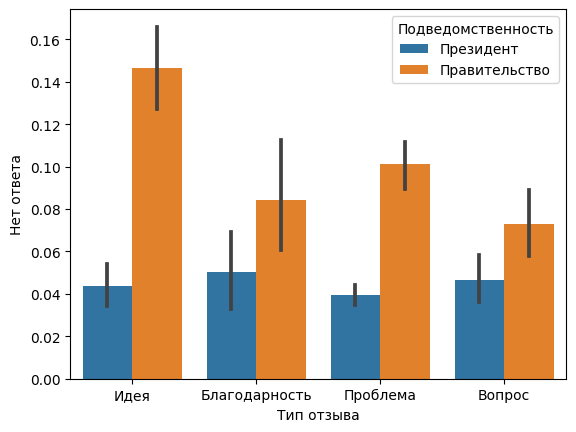

In [ ]:
df['Нет ответа']=pd.isna(df['Ответ'])
sns.barplot(x='Тип отзыва',y='Нет ответа', hue='Подведомственность',data=df)

<Axes: xlabel='Тип отзыва', ylabel='Нет ответа'>

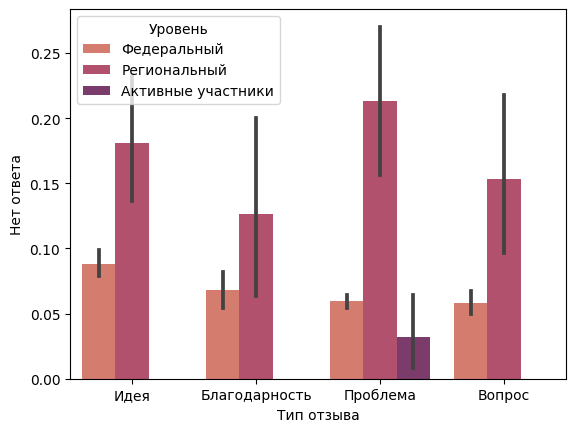

In [ ]:
sns.barplot(x='Тип отзыва',y='Нет ответа',hue='Уровень',palette='flare',data=df)

In [ ]:
#Задание №6
#Смена формата данных колонки "Дата отзыва"

In [ ]:
df['Дата отзыва'].head()

0    25.08.12
1    30.01.15
2    01.02.15
3    02.02.15
4    03.02.15
Name: Дата отзыва, dtype: object

In [ ]:
df.dtypes

Уровень                 object
Сайт                    object
Адрес                   object
Дата сайта              object
Тип субъекта            object
Подведомственность      object
Дата отзыва             object
Тип отзыва              object
Заголовок               object
Сообщение               object
Ответ                   object
Куратор                 object
Решение куратора        object
Дата ответа куратора    object
Статус                  object
Оценка отзыва           object
Нет ответа                bool
dtype: object

In [ ]:
df['Дата отзыва']=pd.to_datetime((df['Дата отзыва']))
df.dtypes

Уровень                         object
Сайт                            object
Адрес                           object
Дата сайта                      object
Тип субъекта                    object
Подведомственность              object
Дата отзыва             datetime64[ns]
Тип отзыва                      object
Заголовок                       object
Сообщение                       object
Ответ                           object
Куратор                         object
Решение куратора                object
Дата ответа куратора            object
Статус                          object
Оценка отзыва                   object
Нет ответа                        bool
dtype: object

In [ ]:
df['Дата отзыва'].head()

0   2012-08-25
1   2015-01-30
2   2015-01-02
3   2015-02-02
4   2015-03-02
Name: Дата отзыва, dtype: datetime64[ns]

In [ ]:
#Задание №7
#Создание колонки "День недели отзыва"

In [ ]:
df['День недели отзыва1']=df['Дата отзыва'].dt.dayofweek

In [ ]:
df[['Дата отзыва','День недели отзыва1']].head()

,Дата отзыва,День недели отзыва1
0,2012-08-25,5
1,2015-01-30,4
2,2015-01-02,4
3,2015-02-02,0
4,2015-03-02,0


In [ ]:
df['День недели отзыва'] = df['Дата отзыва']. dt.day_name () #другой способ

In [ ]:
df[['Дата отзыва','День недели отзыва']].head() #вывод названия в виде строки

,Дата отзыва,День недели отзыва
0,2012-08-25,Saturday
1,2015-01-30,Friday
2,2015-01-02,Friday
3,2015-02-02,Monday
4,2015-03-02,Monday


In [ ]:
#Задание №8
#Определение количества отзывов по дням
df8=df.groupby(df['День недели отзыва'])['День недели отзыва'].count().reset_index(name='Число отзывов')
df8.head(7)

,День недели отзыва,Число отзывов
0,Friday,2640
1,Monday,2526
2,Saturday,1375
3,Sunday,1450
4,Thursday,2716
5,Tuesday,3005
6,Wednesday,2876


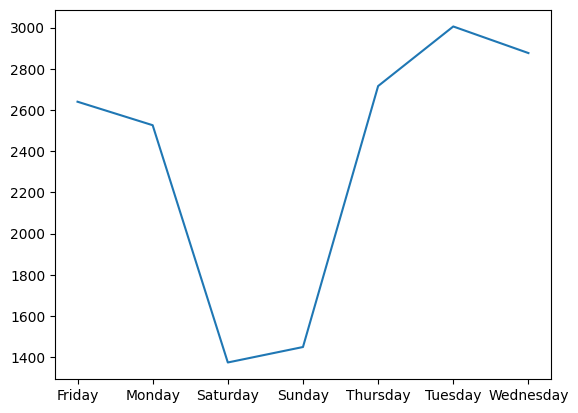

In [ ]:
#Построение графика
plt.plot(df8['День недели отзыва'],df8['Число отзывов'])

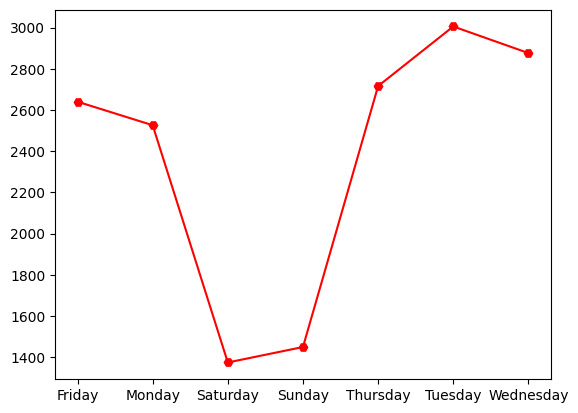

In [ ]:
plt.plot(df8['День недели отзыва'],df8['Число отзывов'],'-H',color='r')

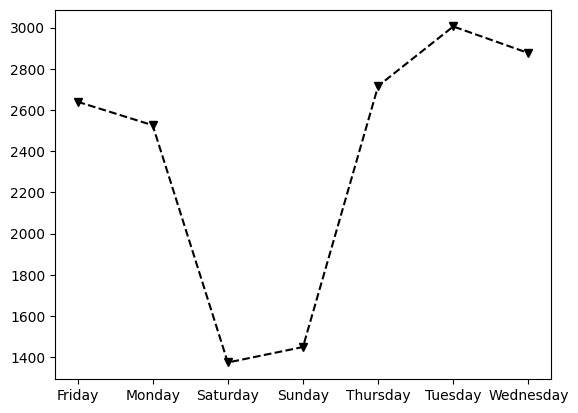

In [ ]:
plt.plot(df8['День недели отзыва'],df8['Число отзывов'],'--v',color='k')

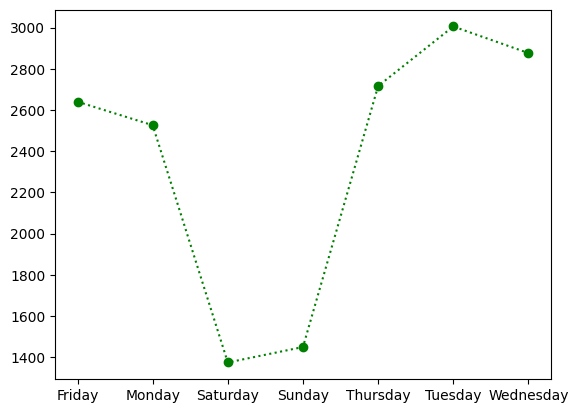

In [ ]:
plt.plot(df8['День недели отзыва'],df8['Число отзывов'],':o',color='g')

<Axes: xlabel='День недели отзыва'>

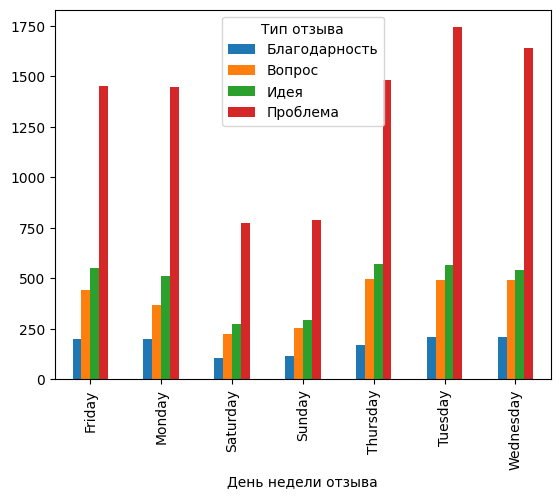

In [ ]:
#Задание 9
ua_df=df.pivot_table(index='День недели отзыва',aggfunc='count',values='Уровень',columns='Тип отзыва')
ua_df.plot.bar()

In [ ]:
df.head()


,Уровень,Сайт,Адрес,Дата сайта,Тип субъекта,Подведомственность,Дата отзыва,Тип отзыва,Заголовок,Сообщение,Ответ,Куратор,Решение куратора,Дата ответа куратора,Статус,Оценка отзыва,Нет ответа,День недели отзыва1,День недели отзыва
0,Федеральный,Министерство внутренних дел Российской Федерации,http://www.mvd.ru/,16.05.13,NaN,Президент,2012-08-25,Идея,На МВД возложены функции по контролю за оборот...,На МВД возложены функции по контролю за оборот...,NaN,NaN,NaN,NaN,Рассмотрение,NaN,True,5,Saturday
1,Федеральный,Министерство здравоохранения Российской Федерации,http://www.rosminzdrav.ru,16.05.13,NaN,Правительство,2015-01-30,Благодарность,работа сайта,Технически сайт работает безупречно. Молодцы р...,Спасибо за Ваш отзыв.,Минздрав России,Обработать,02.02.15,Обработан,NaN,False,4,Friday
2,Федеральный,Министерство здравоохранения Российской Федерации,http://www.rosminzdrav.ru,16.05.13,NaN,Правительство,2015-01-02,Идея,Идея,"Здравствуйте!Очень приятно,что наше государств...",Уважаемая Инна! Спасибо за Вашу идею.,Минздрав России,Обработать,02.02.15,Обработан,NaN,False,4,Friday
3,Федеральный,Министерство здравоохранения Российской Федерации,http://www.rosminzdrav.ru,16.05.13,NaN,Правительство,2015-02-02,Идея,Предложение по оформлению рассылки.,Если возможно в рассылке указывать направление...,Спасибо за Ваш отзыв.,Минздрав России,Обработать,02.02.15,Обработан,NaN,False,0,Monday
4,Федеральный,Министерство здравоохранения Российской Федерации,http://www.rosminzdrav.ru,16.05.13,NaN,Правительство,2015-03-02,Идея,Информатизация,Внести в Мин. здрав России отдельную структурн...,Спасибо за Вашу идею.,Минздрав России,Обработать,03.02.15,Обработан,NaN,False,0,Monday


In [ ]:
#Количество неотвеченных отзывов у Министерство внутренних дел Российской Федерации
len(df[(df['Сайт']=='Министерство внутренних дел Российской Федерации') &(df['Нет ответа']==True)])

1